In [5]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from matplotlib import pyplot as plt
import cPickle as pickle
import numpy as np
import os

from scipy.misc import imread
import h5py

batch_size = 32
nb_classes = 10
nb_epoch = 20
data_augmentation = True

In [ ]:
# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10('cifar-10-batches-py')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [9]:
#Expoting in hdf5 format
with h5py.File('cifar-10.h5', 'w') as hf:
    hf.create_dataset('X_train', data=X_train)
    hf.create_dataset('X_test', data=X_test)
    hf.create_dataset('y_train', data=y_train)
    hf.create_dataset('y_test', data=y_test)
with h5py.File('cifar-10.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('X_train')
    X_train = np.array(data)
    data = hf.get('X_test')
    X_test = np.array(data)
    data = hf.get('y_train')
    y_train = np.array(data)
    data = hf.get('y_test')
    y_test = np.array(data)

List of arrays in this file: 
 [u'X_test', u'X_train', u'y_test', u'y_train']


In [12]:
del X_test, X_train, y_train, y_test

In [20]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

batch_size = 32
nb_classes = 2
nb_epoch = 200
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
first_layer = model.layers[-1]
# this is a placeholder tensor that will contain our generated images
input_img = first_layer.input

model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.10,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.10,  # randomly shift images vertically (fraction of total height)
        vertical_flip=False,
        zoom_range=0.1,
        shear_range=0.1,
        fill_mode="nearest")  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
#     datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
#     model.fit_generator(datagen.flow(X_train, Y_train,
#                         batch_size=batch_size),
#                         samples_per_epoch=X_train.shape[0],
#                         nb_epoch=nb_epoch,
#                         validation_data=(X_test, Y_test))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_4 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 32, 32, 32)    0           convolution2d_4[0][0]            


____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 32, 30, 30)    9248        activation_6[0][0]               
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 32, 30, 30)    0           convolution2d_5[0][0]            


____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 32, 15, 15)    0           activation_7[0][0]               
____________________________________________________________________________________________________
dropout_4 (Dropout)              (None, 32, 15, 15)    0           maxpooling2d_3[0][0]             
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 64, 15, 15)    18496       dropout_4[0][0]                  
____________________________________________________________________________________________________
activation_8 (Activation)        (None, 64, 15, 15)    0           convolution2d_6[0][0]            


____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 64, 7, 7)      0           activation_8[0][0]               
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 64, 7, 7)      0           maxpooling2d_4[0][0]             
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 3136)          0           dropout_5[0][0]                  
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 32)            100384      flatten_2[0][0]                  
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 32)            0           dense_3[0][0]          


____________________________________________________________________________________________________
activation_10 (Activation)       (None, 2)             0           dense_4[0][0]                    
Total params: 129090
____________________________________________________________________________________________________
Using real-time data augmentation.


In [31]:
for layer in model.layers:
    print (layer)

/home/perceptron/cape_coalwood/text/text-non-text/new_classifier


1/1 [==============================] - 0s


[0]


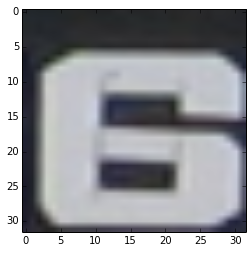

In [21]:
%cd /home/perceptron/cape_coalwood/text/text-non-text/new_classifier

%matplotlib inline
from skimage.transform import resize
model.load_weights('weights.hdf5')

# img_1 = plt.imread('I00017.png')
# img_1 = resize(img_1, (32,32,3))

img_1 = plt.imread('img007-00014.png')
img_1 = resize(img_1, (32,32,3))
plt.imshow(img_1)
img_1 = np.expand_dims(img_1, axis=0).transpose((0, 3, 1, 2))
trial = np.ones((1,3,32,32))
# print (img_1.shape)

prediction = model.predict_classes(img_1, verbose=1)
print (prediction)

In [7]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

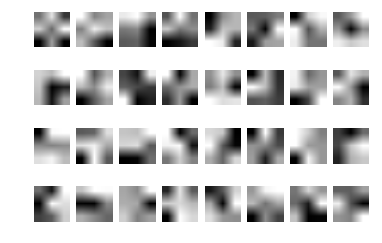

In [11]:
g = model.layers[0].get_weights()[0]
# print (g.shape)
for i in range(32):
    img = deprocess_image(g[i,:,:,:]).mean(axis=2)
    plt.subplot(4,8,i)
    plt.axis('off')
    plt.imshow(img, cmap="Greys_r")
    if i==31:
        plt.savefig('first_layer_weight_grey.png')

In [70]:
p = model.layers[2]
(p.get_weights()[0].shape)

(32, 32, 3, 3)

In [27]:
# layer_dict = dict([(layer.name, layer) for layer in model.layers])
from __future__ import print_function
from scipy.misc import imsave
import numpy as np
import time
import os
import h5py

from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras import backend as K

img_width = 32
img_height = 32
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

input_img = model.layers[0].input
kept_filters = []
for filter_index in range(0, 32):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
 

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = model.layers[2].output
    loss = K.mean(layer_output[:, filter_index, :, :])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
#     end_time = time.time()
#     print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

# we will stich the best 64 filters on a 8 x 8 grid.

Processing filter 0
Current loss value:

 221.344451904
Current loss value: 223.028884888
Current loss value: 224.713195801
Current loss value: 226.397277832
Current loss value: 228.081100464
Current loss value: 229.76473999
Current loss value: 231.448165894
Current loss value:

 233.131332397
Current loss value: 234.814376831
Current loss value: 236.497283936
Current loss value: 238.179977417
Current loss value: 239.862579346
Current loss value: 241.545013428
Current loss value: 243.227279663
Current loss value: 244.909347534
Current loss value:

 246.591262817
Current loss value: 248.273086548
Current loss value: 249.954681396
Current loss value: 251.636199951
Current loss value: 253.317657471
Processing filter 1
Current loss value:

 65.3406677246
Current loss value: 66.5287399292
Current loss value: 67.7161331177
Current loss value: 68.9028549194
Current loss value:

 70.089012146
Current loss value: 71.2746658325
Current loss value: 72.4598770142
Current loss value:

 73.6447677612
Current loss value: 74.8293762207
Current loss value: 76.0137252808
Current loss value: 77.1979598999
Current loss value: 78.381980896
Current loss value: 79.5657958984
Current loss value: 80.7494049072
Current loss value: 81.9328308105
Current loss value: 83.1161117554
Current loss value: 84.2993469238
Current loss value: 85.4825210571
Current loss value: 86.6656341553
Current loss value:

 87.8486709595
Processing filter 2
Current loss value:

 267.21182251
Current loss value: 269.267913818
Current loss value: 271.323944092
Current loss value: 273.379852295
Current loss value: 275.43572998
Current loss value: 277.491546631
Current loss value: 279.547271729
Current loss value:

 281.602905273
Current loss value: 283.658416748
Current loss value: 285.713897705
Current loss value: 287.769256592
Current loss value: 289.824432373
Current loss value: 291.879608154
Current loss value:

 293.934661865
Current loss value: 295.989624023
Current loss value: 298.044433594
Current loss value: 300.099273682
Current loss value: 302.154022217
Current loss value: 304.208709717
Current loss value: 306.263244629
Processing filter 3
Current loss value:

 -93.4452590942
Processing filter 4
Current loss value:

 -110.193458557
Processing filter 5
Current loss value:

 145.130599976
Current loss value: 146.352874756
Current loss value: 147.575180054
Current loss value: 148.797439575
Current loss value: 150.019714355
Current loss value: 151.241928101
Current loss value: 152.464096069
Current loss value: 153.686264038
Current loss value: 154.908416748
Current loss value: 156.130569458
Current loss value: 157.352722168
Current loss value: 158.574920654
Current loss value:

 159.797103882
Current loss value: 161.019241333
Current loss value: 162.241378784
Current loss value: 163.463485718
Current loss value: 164.685592651
Current loss value: 165.907653809
Current loss value: 167.129714966
Current loss value: 168.351760864
Processing filter 6
Current loss value:

 32.4818611145
Current loss value: 33.2516555786
Current loss value: 34.0215568542
Current loss value: 34.7915840149
Current loss value: 35.5617485046
Current loss value: 36.3320159912
Current loss value: 37.1023597717
Current loss value: 37.8728752136
Current loss value: 38.6435775757
Current loss value: 39.4144325256
Current loss value: 40.185459137
Current loss value: 40.956703186
Current loss value:

 41.7280540466
Current loss value: 42.4995651245
Current loss value: 43.2712211609
Current loss value: 44.0429115295
Current loss value: 44.8146514893
Current loss value: 45.5865211487
Current loss value: 46.3585586548
Current loss value: 47.1305923462
Processing filter 7
Current loss value:

 311.014801025
Current loss value: 313.339752197
Current loss value: 315.664672852
Current loss value: 317.989593506
Current loss value: 320.31439209
Current loss value: 322.639129639
Current loss value: 324.963775635
Current loss value: 327.288421631
Current loss value: 329.612945557
Current loss value: 331.9375
Current loss value: 334.261993408
Current loss value: 336.586364746
Current loss value: 338.910644531
Current loss value: 341.234863281
Current loss value:

 343.558990479
Current loss value: 345.883117676
Current loss value: 348.207122803
Current loss value: 350.531097412
Current loss value: 352.854980469
Current loss value: 355.178771973
Processing filter 8
Current loss value:

 -247.603317261
Processing filter 9
Current loss value:

 -118.940887451
Processing filter 10
Current loss value:

 -57.3569602966
Processing filter 11
Current loss value:

 217.845870972
Current loss value: 219.468978882
Current loss value: 221.092086792
Current loss value: 222.715164185
Current loss value: 224.338302612
Current loss value: 225.961395264
Current loss value: 227.584518433
Current loss value: 229.207595825
Current loss value: 230.830718994
Current loss value: 232.453826904
Current loss value: 234.076904297
Current loss value: 235.699981689
Current loss value: 237.323059082
Current loss value:

 238.946121216
Current loss value: 240.569229126
Current loss value: 242.192337036
Current loss value: 243.815429688
Current loss value: 245.438537598
Current loss value: 247.061630249
Current loss value: 248.684753418
Processing filter 12
Current loss value:

 -102.840766907
Processing filter 13
Current loss value:

 -217.888763428
Processing filter 14
Current loss value:

 526.887573242
Current loss value: 530.83001709
Current loss value: 534.772399902
Current loss value: 538.714782715
Current loss value: 542.657226562
Current loss value: 546.599609375
Current loss value: 550.541992188
Current loss value: 554.484436035
Current loss value: 558.426818848
Current loss value: 562.36920166
Current loss value: 566.311584473
Current loss value: 570.25390625
Current loss value: 574.196289062
Current loss value: 578.13861084
Current loss value: 582.080932617
Current loss value:

 586.023254395
Current loss value: 589.965637207
Current loss value: 593.907958984
Current loss value: 597.850219727
Current loss value: 601.792541504
Processing filter 15
Current loss value:

 -70.394317627
Processing filter 16
Current loss value:

 -129.87008667
Processing filter 17
Current loss value:

 101.05796051
Current loss value: 101.985832214
Current loss value: 102.913780212
Current loss value: 103.841842651
Current loss value: 104.769966125
Current loss value: 105.698097229
Current loss value: 106.626243591
Current loss value: 107.554367065
Current loss value: 108.482498169
Current loss value: 109.410621643
Current loss value: 110.33870697
Current loss value: 111.266792297
Current loss value: 112.194877625
Current loss value: 113.123001099
Current loss value: 114.051071167
Current loss value:

 114.979118347
Current loss value: 115.907157898
Current loss value: 116.835205078
Current loss value: 117.763206482
Current loss value: 118.691040039
Processing filter 18
Current loss value:

 343.714447021
Current loss value: 346.305969238
Current loss value: 348.897460938
Current loss value: 351.488891602
Current loss value: 354.08026123
Current loss value: 356.671569824
Current loss value: 359.2628479
Current loss value: 361.854095459
Current loss value: 364.445281982
Current loss value: 367.036315918
Current loss value: 369.627258301
Current loss value: 372.218139648
Current loss value: 374.808929443
Current loss value: 377.399627686
Current loss value:

 379.990325928
Current loss value: 382.580963135
Current loss value: 385.171508789
Current loss value: 387.761993408
Current loss value: 390.35244751
Current loss value: 392.942749023
Processing filter 19
Current loss value:

 463.576965332
Current loss value: 467.101898193
Current loss value: 470.62689209
Current loss value: 474.151947021
Current loss value: 477.677124023
Current loss value: 481.202301025
Current loss value: 484.727600098
Current loss value: 488.252929688
Current loss value: 491.778289795
Current loss value: 495.303741455
Current loss value: 498.829223633
Current loss value: 502.354797363
Current loss value: 505.880401611
Current loss value: 509.406097412
Current loss value:

 512.931884766
Current loss value: 516.457702637
Current loss value: 519.983520508
Current loss value: 523.509399414
Current loss value: 527.035339355
Current loss value: 530.561279297
Processing filter 20
Current loss value:

 -156.581344604
Processing filter 21
Current loss value:

 -136.764877319
Processing filter 22
Current loss value:

 563.233215332
Current loss value: 567.454101562
Current loss value: 571.674987793
Current loss value: 575.896057129
Current loss value: 580.11706543
Current loss value: 584.338256836
Current loss value: 588.559448242
Current loss value: 592.780822754
Current loss value: 597.00201416
Current loss value: 601.223388672
Current loss value: 605.444702148
Current loss value: 609.666259766
Current loss value: 613.887817383
Current loss value: 618.109436035
Current loss value:

 622.331054688
Current loss value: 626.55279541
Current loss value: 630.774536133
Current loss value: 634.996276855
Current loss value: 639.218017578
Current loss value: 643.439880371
Processing filter 23
Current loss value:

 592.30090332
Current loss value: 596.774841309
Current loss value: 601.248840332
Current loss value: 605.72277832
Current loss value: 610.196838379
Current loss value: 614.670898438
Current loss value: 619.144897461
Current loss value: 623.619018555
Current loss value: 628.093078613
Current loss value: 632.567260742
Current loss value: 637.041320801
Current loss value: 641.515441895
Current loss value: 645.989562988
Current loss value: 650.463684082
Current loss value:

 654.937805176
Current loss value: 659.41204834
Current loss value: 663.886291504
Current loss value: 668.360412598
Current loss value: 672.834594727
Current loss value: 677.308776855
Processing filter 24
Current loss value:

 -164.914932251
Processing filter 25
Current loss value:

 543.863647461
Current loss value: 547.985656738
Current loss value: 552.107727051
Current loss value: 556.229919434
Current loss value: 560.352172852
Current loss value: 564.47442627
Current loss value: 568.596740723
Current loss value: 572.719177246
Current loss value: 576.84161377
Current loss value: 580.964111328
Current loss value: 585.086669922
Current loss value: 589.209289551
Current loss value:

 593.33190918
Current loss value: 597.454467773
Current loss value: 601.577209473
Current loss value: 605.699951172
Current loss value: 609.822692871
Current loss value: 613.945495605
Current loss value: 618.06829834
Current loss value: 622.191223145
Processing filter 26
Current loss value:

 254.211410522
Current loss value: 256.108459473
Current loss value: 258.005523682
Current loss value: 259.902648926
Current loss value: 261.799743652
Current loss value: 263.696899414
Current loss value: 265.594055176
Current loss value: 267.49118042
Current loss value: 269.388366699
Current loss value: 271.285583496
Current loss value: 273.182769775
Current loss value: 275.08001709
Current loss value: 276.977233887
Current loss value:

 278.874481201
Current loss value: 280.771697998
Current loss value: 282.668914795
Current loss value: 284.566192627
Current loss value: 286.463439941
Current loss value: 288.360717773
Current loss value: 290.257995605
Processing filter 27
Current loss value:

 163.244155884
Current loss value: 164.659744263
Current loss value: 166.075363159
Current loss value: 167.490966797
Current loss value: 168.906555176
Current loss value: 170.322174072
Current loss value: 171.737792969
Current loss value: 173.153396606
Current loss value: 174.569000244
Current loss value: 175.984573364
Current loss value: 177.400146484
Current loss value: 178.815734863
Current loss value:

 180.23135376
Current loss value: 181.646972656
Current loss value: 183.062561035
Current loss value: 184.478225708
Current loss value: 185.893936157
Current loss value: 187.309616089
Current loss value: 188.725296021
Current loss value: 190.141036987
Processing filter 28
Current loss value:

 273.164367676
Current loss value: 275.200805664
Current loss value: 277.23727417
Current loss value: 279.273742676
Current loss value: 281.310241699
Current loss value: 283.34677124
Current loss value: 285.383361816
Current loss value: 287.419952393
Current loss value: 289.456573486
Current loss value:

 291.493164062
Current loss value: 293.529785156
Current loss value: 295.566436768
Current loss value: 297.603057861
Current loss value: 299.63973999
Current loss value: 301.676452637
Current loss value:

 303.713165283
Current loss value: 305.74987793
Current loss value: 307.786560059
Current loss value: 309.823272705
Current loss value: 311.860015869
Processing filter 29
Current loss value:

 -47.4561347961
Processing filter 30
Current loss value:

 -82.080619812
Processing filter 31
Current loss value:

IndexError: list index out of range

 -124.280601501


In [30]:
n = 3

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 10
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        print ((i,j))
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
imsave('stitched_filters_%dx%d.png' % (n, n), stitched_filters)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


In [4]:
import h5py
import numpy as np

with h5py.File('test_samples.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('X_pos')
    X_pos = np.array(data)

List of arrays in this file: 
 [u'X_pos', u'list']


<bound method File.values of <Closed HDF5 file>>

In [8]:
X_pos.shape
X_pos = X_pos.transpose((0, 3, 1, 2))
y_test = np.ones((X_pos.shape[0]))
y_test = y_test = np_utils.to_categorical(y_test, 2)

score = model.evaluate(X_pos, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 3.7546192509
Test accuracy: 0.766894457099


/home/perceptron/cape_coalwood/text/text-non-text/new_classifier
Test score:

 16.1180953979
Test accuracy: 0.0


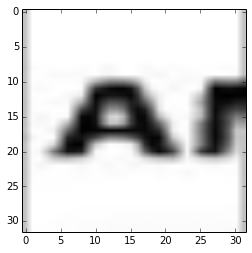

In [24]:
%cd /home/perceptron/cape_coalwood/text/text-non-text/new_classifier
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from skimage import data
from skimage.transform import pyramid_gaussian

image = plt.imread('img.jpg')
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, max_layer=3))

img = resize(image, (32,32,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0).transpose((0, 3, 1, 2))

y = np_utils.to_categorical(np.ones((1)), 2)
score = model.evaluate(img,y, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [12]:
# Let us just apply the method to a single image and see what are the results
import time
img = plt.imread('trial_image.jpeg').transpose((2, 0, 1))
channels, rows, cols = img.shape

enlarged = np.lib.pad(img, ((0,0), (16, 16), (16,16)), mode='mean') 
# print (enlarged.shape)
heat_map = np.zeros((rows, cols))
t1 = time.clock()
for r in np.arange(rows-32):
    for c in np.arange(cols-32):
        temp = np.expand_dims(enlarged[:, r:r+32, c:c+32], axis=0)
        heat_map[r, c] = model.predict(temp)[0,0]
        break
print("Time taken for one image: ", time.clock()-t1)

Time taken for one image:  2.905522


In [7]:
heat_map.shape
# plt.imshow(heat_map)

(2,)

In [2]:
import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread

def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  with open(filename, 'rb') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

path = '/home/perceptron/cape_coalwood/text/cifar-10-batches-py/data_batch_1'

X, Y = load_CIFAR_batch(path)

In [14]:
img = X[1]
# img.shape
# img = np.expand_dims(img, axis=0).transpose((0, 3, 1, 2))

# # print (img_1.shape)
# import time 
# t1 = time.clock()
# prediction = model.predict(img, verbose=1)
# print (time.clock()-t1)
# print (prediction)
# print (img[:].shape)

In [10]:
import h5py
import numpy as np

with h5py.File('positive_samples.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('X_pos')
    X_pos = np.array(data)

with h5py.File('classifier_data.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('X_neg')
    X_neg = np.array(data)
    
with h5py.File('new_classifier.h5', 'w') as hf:
    hf.create_dataset('X_pos', data=X_pos)
    hf.create_dataset('X_neg', data=X_neg)

List of arrays in this file: 
 [u'X_pos', u'list']
